In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [4]:
# Google colab
#from google.colab import drive
#drive.mount('/content/drive')
#root = '/content/drive/MyDrive/0AccTeam/'
root = './Blueberry'

In [5]:
# Google colab
# consumo_dir = '/content/drive/MyDrive/0AccTeam/datasets_consumo/'

consumo_dir = './datasets_consumo'

In [6]:
negocios = pd.read_csv(consumo_dir + "negocio_consumo.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (51,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
negocios = negocios.negocio_id

In [8]:
checkin = pd.read_csv(root+"checkin.csv")
checkin = checkin[checkin.negocio_id.isin(negocios)]

In [9]:
checkin.head(2)

,negocio_id,fecha
0,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
1,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."


In [10]:
checkin["visitas"] = checkin.fecha.apply(lambda f: f.count(",") +1)

In [11]:
dic = {"negocio_id": [], "fecha":[]}

for row in checkin.iterrows():
    fechas = eval("['"+ row[1].fecha.replace(", ", "','") + "']")
    dic["negocio_id"].extend([row[1].negocio_id]*len(fechas))
    dic["fecha"].extend(fechas)

In [16]:
checkin2 = pd.DataFrame(dic)
checkin2 = checkin2[["negocio_id", "fecha"]]

In [17]:
checkin2.index = pd.to_datetime(checkin2.index)

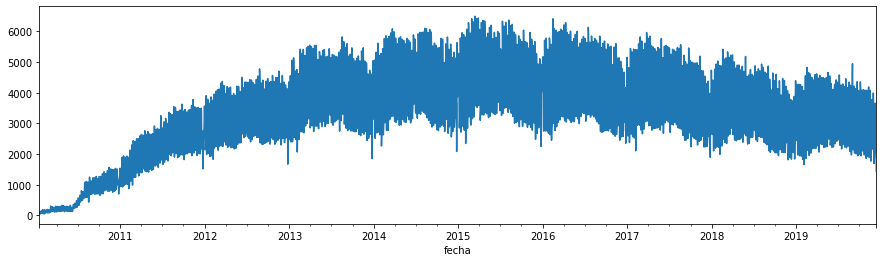

In [14]:
checkin2.resample("1D").sum().plot(figsize=(15,4),legend=False)

In [36]:
checkin2.tail()

,negocio_id,fecha
1970-01-01 00:00:00.011340366,zzzaIBwimxVej4tY6qFOUQ,2014-07-04 21:28:29
1970-01-01 00:00:00.011340367,zzzaIBwimxVej4tY6qFOUQ,2014-07-14 01:02:55
1970-01-01 00:00:00.011340368,zzzaIBwimxVej4tY6qFOUQ,2014-07-14 21:26:59
1970-01-01 00:00:00.011340369,zzzaIBwimxVej4tY6qFOUQ,2014-07-17 01:06:02
1970-01-01 00:00:00.011340370,zzzaIBwimxVej4tY6qFOUQ,2014-07-17 19:20:28


In [ ]:
checkin_negocio.resample("1D").sum().plot(figsize=(15,4),legend=False)

In [ ]:
resenias = pd.read_csv(consumo_dir+"reseña_sin_comentario_consumo.csv")

In [ ]:
resenias.head(2)

,reseña_id,usuario_id,negocio_id,estrellas,util,gracioso,genial,fecha
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,2015-12-05 03:18:11
1,L2O_INwlrRuoX05KSjc4eg,5vD2kmE25YBrbayKhykNxQ,nlxHRv1zXGT0c0K51q3jDg,5.0,2.0,0.0,0.0,2013-05-07 07:25:25


In [ ]:
reseniaByDate = resenias[["negocio_id", "fecha"]].groupby("fecha").count()

In [ ]:
reseniaByDate.index = pd.to_datetime(reseniaByDate.index)

### Serie de tiempo de checkin y cantidad de reseñas

In [ ]:
checkin2_plot = checkin2.resample("1D").sum()["2010-01-01":]
resenia_plot = reseniaByDate.resample("1D").sum()["2010-01-01":]


Text(0.5, 0, 'Tiempo')

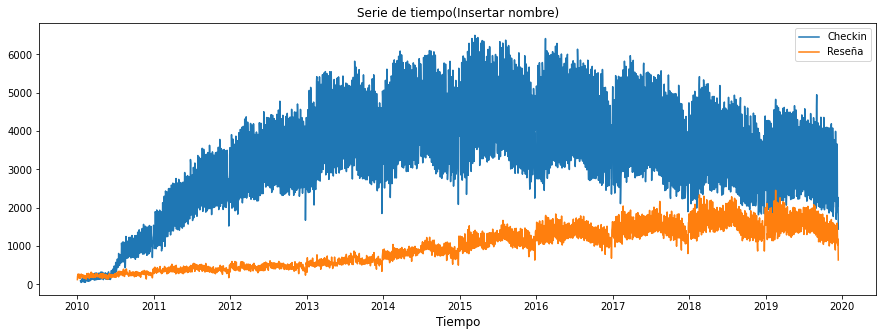

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(checkin2_plot.index, checkin2_plot.negocio_id, label="Checkin")
plt.plot(resenia_plot.index, resenia_plot.negocio_id, label="Reseña")
plt.legend()

plt.title("Serie de tiempo(Insertar nombre)", size=(12))
plt.xlabel("Tiempo", size=(12))